# Task 1.2

In [135]:
'''>>>>> start CodeP2.2F23-updated
    V.P. Carey ME249, Fall 2023

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.99, 32.2, 31.7, 30.92, 32.4, 31.4, 35.53, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.956452
1    0.993796
2    0.978365
3    0.954292
4    0.999969
5    0.969106
6    1.096571
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [136]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])
model.summary()

#set starting values to those used in first principles model
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_one (Dense)            (None, 1)                 4         
_________________________________________________________________
dense_two (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_three (Dense)          (None, 1)                 2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
(3, 1)
(1, 1)
(1, 1)


In [137]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms, metrics=['mae'])


# DATA INPUT IS IN THIS CELL

In [138]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)
###
###
###
###
###
###
#HERE --|
       #v
###
###
###
###
###

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
8/8 [==============================] - 0s 56ms/step - loss: 0.0449 - mae: 0.0449
Epoch 2/400
8/8 [==============================] - 0s 231us/step - loss: 0.0307 - mae: 0.0307
Epoch 3/400
8/8 [==============================] - 0s 584us/step - loss: 0.0237 - mae: 0.0237
Epoch 4/400
8/8 [==============================] - 0s 977us/step - loss: 0.0177 - mae: 0.0177
Epoch 5/400
8/8 [==============================] - 0s 308us/step - loss: 0.0172 - mae: 0.0172
Epoch 6/400
8/8 [==============================] - 0s 396us/step - loss: 0.0147 - mae: 0.0147
Epoch 7/400
8/8 [==============================] - 0s 583us/step - loss: 0.0166 - mae: 0.0166
Epoch 8/400
8/8 [==============================] - 0s 679us/step - loss: 0.0153 - mae: 0.0153
Epoch 9/400
8/8 [==============================] - 0s 600us/step - loss: 0.0159 - mae: 0.0159
Epoch 10/400
8/8 [==============================] - 0s 853us/step - loss: 0.0165 - mae: 0.0165
Epoch 11/400
8/8 [==============================] - 0s 316us

In [139]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
# print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
# print (first_layer_bias)
print ('b1 = ', b1)
# print (second_layer_weights)
print ('w12 = ', w12)
# print (second_layer_bias)
print ('b2 = ', b2)
# print (third_layer_weights)
print ('w23 = ', w23)
# print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
predicted_values = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    predicted_values.append(a3[0][0] * 32.4)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

mae = historyData.history['mae'][-1]
print(f"MAE = {mae}")

w01 =  1.2057927 w02 =  0.3860516 w03 =  0.70687264
b1 =  [-0.14522089]
w12 =  0.7047266
b2 =  [-0.11338986]
w23 =  0.6820862
b3 =  [0.01850359]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9564519613592172 [[0.95446706]]
0.9900990099009901 1.0 1.0 0.9937964877627233 [[0.97057503]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9783648652819357 [[0.97860694]]
1.0 0.896551724137931 1.009090909090909 0.954291534211907 [[0.96020573]]
0.9900990099009901 1.0 1.0 0.9999691367550383 [[0.97057503]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.9843456]]
1.188118811881188 0.896551724137931 1.009090909090909 1.096571093484769 [[1.0692405]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.4296684]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.989043548038634 [[30.924734]]
20.0 14.5 308.0 32.19900620351223 [[31.446632]]
20.0 15.3 306.0 31.699021635134713 [[31.706867]]
20.2 13.0 310.8 30.919045708

In [140]:
predicted_values

[30.92473268508911,
 31.446631121635434,
 31.706864833831787,
 31.110665774345396,
 31.446631121635434,
 31.89279792308807,
 34.64339060783386,
 46.32125701904297]

## 1(b)

Final weights and biases

w01 =  1.2090731 w02 =  0.37123996 w03 =  0.7092588
b1 =  [-0.1446119]
w12 =  0.7048189
b2 =  [-0.111293]
w23 =  0.6812974
b3 =  [0.02213568]

x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.989043548038634 [[30.948797]]
20.0 14.5 308.0 32.19900620351223 [[31.445976]]
20.0 15.3 306.0 31.699021635134713 [[31.692991]]
20.2 13.0 310.8 30.919045708465788 [[31.135044]]
20.0 14.5 308.0 32.39900003086324 [[31.445976]]
20.2 15.3 306.0 31.3990308941082 [[31.879238]]
23.999999999999996 13.0 310.8 35.52890342890652 [[34.673748]]
36.0 14.5 308.0 46.398567945433776 [[46.34578]]

## 1(c)

### First Principles Model

In [141]:
fp_predicted_df = pd.DataFrame([31.238167853045418,
 31.79729712234356,
 32.07715722939482,
 31.43472882756245,
 31.79729712234356,
 32.07715722939482,
 35.16938734338613,
 47.52217508370643], columns=["y_pred"])
fp_predicted_df

,y_pred
0,31.238168
1,31.797297
2,32.077157
3,31.434729
4,31.797297
5,32.077157
6,35.169387
7,47.522175


### Keras Model

In [142]:
keras_predicted_df = pd.DataFrame(predicted_values, columns=["y_pred"])
keras_predicted_df

,y_pred
0,30.924733
1,31.446631
2,31.706865
3,31.110666
4,31.446631
5,31.892798
6,34.643391
7,46.321257


### Experimental y values

In [143]:
experimental_y_df = pd.DataFrame([30.97, 32.3 , 31.5 , 30.91, 32.5 , 31.4 , 35.59, 46.4 ], columns=["y_exp"])
experimental_y_df

,y_exp
0,30.97
1,32.30
2,31.50
3,30.91
4,32.50
5,31.40
6,35.59
7,46.40


In [152]:
# fp_keras_corr_coeff = np.corrcoef(fp_predicted_df["y_pred"], keras_predicted_df["y_pred"])
# fp_keras_corr_coeff[0][1]

fp_keras_differences = fp_predicted_df["y_pred"] - keras_predicted_df["y_pred"]
std_dev = np.std(fp_keras_differences)
std_dev

0.2959654277641681

First principles R square value

In [144]:
fp_corr_coeff = np.corrcoef(fp_predicted_df["y_pred"], experimental_y_df["y_exp"])
fp_rSquare_value = fp_corr_coeff[0][1] ** 0.5
# fp_rSquare_value = str(fp_rSquare_value)
fp_rSquare_value


0.997030633250133

In [145]:
keras_corr_coeff = np.corrcoef(keras_predicted_df["y_pred"], experimental_y_df["y_exp"])
keras_rSquare_value = keras_corr_coeff[0][1] ** 0.5
# keras_rSquare_value = str(keras_rSquare_value)
keras_rSquare_value

0.996713799471406

In [146]:
import matplotlib.pyplot as plt

## First Principles Plot

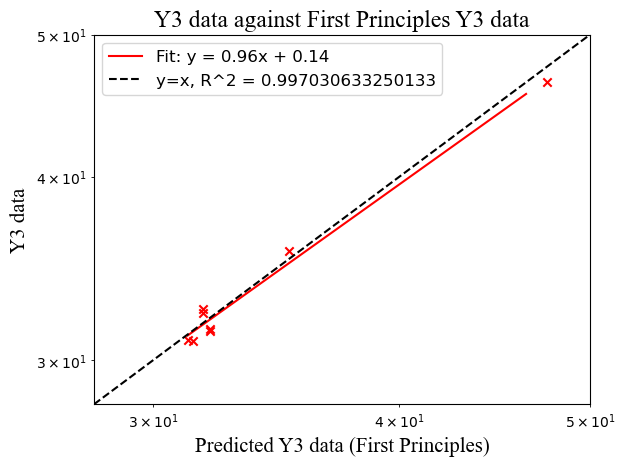

In [147]:
x = fp_predicted_df['y_pred']
y = experimental_y_df['y_exp']

coefficients = np.polyfit(np.log(x), np.log(y), 1)
line_function = np.poly1d(coefficients)

# Create a range for predicted values for the fit line
x_vals = np.linspace(min(x), max(y), 400)
y_vals = np.exp(line_function(np.log(x_vals)))

#best fit line and y = x line
plt.scatter(x, y, c='red', marker='x')
plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {fp_rSquare_value}')
# plt.annotate('R^2 = ' + str(fp_rSquare_value), xy=(0.3, 0.7), xycoords='axes fraction')


#visuals
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12

plt.title('Y3 data against First Principles Y3 data', fontsize=title_font_size, fontfamily=font_family)
plt.xlabel('Predicted Y3 data (First Principles)', fontsize=label_font_size, fontfamily=font_family)
plt.ylabel('Y3 data', fontsize=label_font_size, fontfamily=font_family)

plt.legend(fontsize = legend_tick_font_size)
plt.loglog()
plt.xlim(xmax=50, xmin=28)
plt.ylim(ymax=50, ymin=28)

plt.show()

## Keras Plot

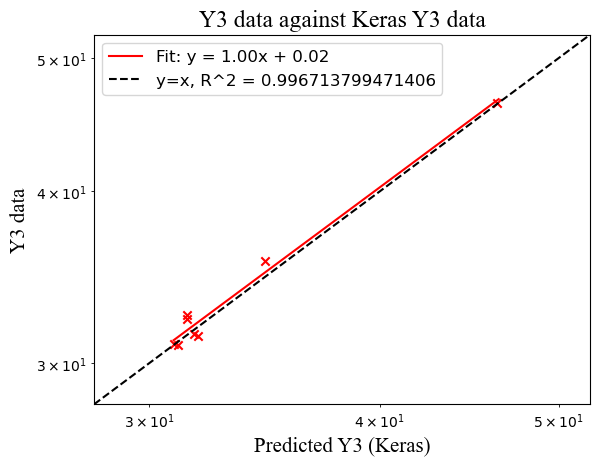

In [153]:
x = keras_predicted_df['y_pred']
y = experimental_y_df['y_exp']

coefficients = np.polyfit(np.log(x), np.log(y), 1)
line_function = np.poly1d(coefficients)

# Create a range for predicted values for the fit line
x_vals = np.linspace(min(x), max(y), 400)
y_vals = np.exp(line_function(np.log(x_vals)))

#best fit line and y = x line
plt.scatter(x, y, c='red', marker='x')
plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {keras_rSquare_value}',)

#visuals
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12


plt.title('Y3 data against Keras Y3 data', fontsize=title_font_size, fontfamily=font_family)
plt.xlabel('Predicted Y3 (Keras)', fontsize=label_font_size, fontfamily=font_family)
plt.ylabel('Y3 data', fontsize=label_font_size, fontfamily=font_family)

plt.legend(fontsize = legend_tick_font_size)
plt.loglog()
plt.xlim(xmax=52, xmin=28)
plt.ylim(ymax=52, ymin=28)

plt.show()

## 1(d)

Original data has been increased by 20% and normalised in new_xy_data_df

In [61]:
new_xy_data_df = pd.DataFrame([[0.88790233, 0.91954023, 1.00729217, 0.91232463],
       [0.88790233, 1.02564103, 0.99821747, 0.95150422],
       [0.88790233, 1.08222812, 0.99173554, 0.92793755],
       [0.89678135, 0.91954023, 1.00729217, 0.91055713],
       [0.88790233, 1.02564103, 0.99821747, 0.95739588],
       [0.88790233, 1.08222812, 0.99173554, 0.92499171],
       [1.0654828 , 0.91954023, 1.00729217, 1.04842214],
       [1.5982242 , 1.02564103, 0.99821747, 1.36686674]], columns=["x01", "x02", "x03", "y3"])
new_xy_data_df

,x01,x02,x03,y3
0,0.887902,0.919540,1.007292,0.912325
1,0.887902,1.025641,0.998217,0.951504
2,0.887902,1.082228,0.991736,0.927938
3,0.896781,0.919540,1.007292,0.910557
4,0.887902,1.025641,0.998217,0.957396
5,0.887902,1.082228,0.991736,0.924992
6,1.065483,0.919540,1.007292,1.048422
7,1.598224,1.025641,0.998217,1.366867


In [72]:
new_x_data = new_xy_data_df.loc[:, "x01":"x03"]
new_x_data.values
xarray = new_x_data.values


## KERAS MODEL

In [73]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])
model.summary()

#set starting values to those used in first principles model
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)

#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms, metrics=['mae'])





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_one (Dense)            (None, 1)                 4         
_________________________________________________________________
dense_two (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_three (Dense)          (None, 1)                 2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
(3, 1)
(1, 1)
(1, 1)


In [74]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)
###
###
###
###
###
###
#HERE --|
       #v
###
###
###
###
###

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
8/8 [==============================] - 0s 38ms/step - loss: 0.0229 - mae: 0.0229
Epoch 2/400
8/8 [==============================] - 0s 196us/step - loss: 0.0523 - mae: 0.0523
Epoch 3/400
8/8 [==============================] - 0s 186us/step - loss: 0.0142 - mae: 0.0142
Epoch 4/400
8/8 [==============================] - 0s 257us/step - loss: 0.0140 - mae: 0.0140
Epoch 5/400
8/8 [==============================] - 0s 189us/step - loss: 0.0139 - mae: 0.0139
Epoch 6/400
8/8 [==============================] - 0s 400us/step - loss: 0.0140 - mae: 0.0140
Epoch 7/400
8/8 [==============================] - 0s 221us/step - loss: 0.0161 - mae: 0.0161
Epoch 8/400
8/8 [==============================] - 0s 192us/step - loss: 0.0192 - mae: 0.0192
Epoch 9/400
8/8 [==============================] - 0s 251us/step - loss: 0.0155 - mae: 0.0155
Epoch 10/400
8/8 [==============================] - 0s 279us/step - loss: 0.0143 - mae: 0.0143
Epoch 11/400
8/8 [==============================] - 0s 191us

In [75]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
# print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
# print (first_layer_bias)
print ('b1 = ', b1)
# print (second_layer_weights)
print ('w12 = ', w12)
# print (second_layer_bias)
print ('b2 = ', b2)
# print (third_layer_weights)
print ('w23 = ', w23)
# print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
predicted_values = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    predicted_values.append(a3[0][0] * 32.4)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

mae = historyData.history['mae'][-1]
print(f"MAE = {mae}")

w01 =  1.2498534 w02 =  0.38129747 w03 =  0.6969478
b1 =  [-0.15465324]
w12 =  0.72776693
b2 =  [-0.12378544]
w23 =  0.7082069
b3 =  [0.00710749]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9564519613592172 [[1.0162137]]
0.9900990099009901 1.0 1.0 0.9937964877627233 [[1.0332782]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9783648652819357 [[1.0417883]]
1.0 0.896551724137931 1.009090909090909 0.954291534211907 [[1.0225917]]
0.9900990099009901 1.0 1.0 0.9999691367550383 [[1.0332782]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[1.0481665]]
1.188118811881188 0.896551724137931 1.009090909090909 1.096571093484769 [[1.1437752]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.5435247]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.989043548038634 [[32.925323]]
20.0 14.5 308.0 32.19900620351223 [[33.478214]]
20.0 15.3 306.0 31.699021635134713 [[33.753944]]
20.2 13.0 310.8 30.9190457084657